<a href="https://colab.research.google.com/github/henryspg/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics as sts

In [0]:
# Using array

sale = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sale.tolist()

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
# Using statistics

print("mean       :", sts.mean(sale))
print("variance   :", sts.variance(sale))
print("stdev      :", sts.stdev(sale))

mean       : 3052
variance   : 214387
stdev      : 463.0194380368928


In [0]:
# Try using DataFrame: sales

sales = pd.DataFrame([3505, 2400, 3027, 2798, 3700, 3250, 2689])
print("mean            :  ", sales.mean().sum())
print("variance        :  ", sales.var().sum())
print("st dev          :  ", sales.std().sum())

mean            :   3052.714285714286
variance        :   214387.90476190476
st dev          :   463.02041505953576


In [0]:
# sales

In [0]:
print("mean       :", np.mean(sales).sum())
print("variance   :", np.var(sales).sum())
print("stdev      :", np.std(sales).sum())

mean       : 3052.714285714286
variance   : 183761.0612244898
stdev      : 428.67360686714756


In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
print("mean       :", sts.mean(sales))
print("variance   :", sts.variance(sales))
print("stdev      :", sts.stdev(sales))

mean       : 3052.714285714286
variance   : 214387.90476190476
stdev      : 463.02041505953576


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
## The data has 2 columns, will use dataframe
cust = [127, 80, 105, 92, 120, 115, 93]

In [0]:
df = pd.DataFrame({'customer':cust, 'sales':sales})
df.head()

,customer,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700


In [0]:
# df.mean()

In [0]:
df.cov()

,customer,sales
customer,290.952381,7604.357143
sales,7604.357143,214387.904762


In [176]:
# another way to find  cov()

# covariance = df[['sales','customer']].cov()  ## results in 2x2 matrix
covariance = df.cov()['sales']['customer'] ## results in 1 value
covariance

7604.357142857142

In [166]:
#Compare using statistics pkg  for mean

sts.mean(df['sales'])

3052.714285714286

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [167]:
# standard deviation of customers who entered the store last week

print("stdev customer: ", df['customer'].std())
# print("stdev sales   : ", df['sales'].std())

stdev customer:  17.057326313123664


In [168]:
# correlation coefficient 

df[['customer', 'sales']].corr()

,customer,sales
customer,1.000000,0.962834
sales,0.962834,1.000000


In [0]:
# Using function:  define mean 1st

def mean(data, ddof=0):
  data = np.array(data)
  return sum(data)/(len(data) - ddof)

In [170]:
def variance(data):
  data = np.array(data)
  variance = mean((data - mean(data))**2, ddof = 1)
  return variance

variance(df['sales'])

214387.90476190473

In [171]:
def stdev(data):
  data = np.array(data)
  std = np.sqrt(variance(data))
  return std

stdev(df['sales'])

463.0204150595357

In [172]:
### result is different than from Ryan

def correlation(covariance, var1, var2):
  var1 = np.array(var1)
  var2 = np.array(var2)
  std1 = stdev(var1)
  std2 = stdev(var2)
  r = covariance / (std1*std2)
  return r

correlation(covariance, df['sales'], df['customer'])

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
!wget 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'


--2020-05-19 23:27:26--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.03s   

2020-05-19 23:27:26 (4.13 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [0]:
df_titanic = pd.read_csv('titanic_clean.csv')
df_titanic

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [159]:
print(df_titanic.shape)
df_titanic.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [192]:
# Use only columns with numbers: dfnr

df_nr = df_titanic[['pclass', 'survived', 'age', 'parch', 'sibsp', 'fare', 'has_cabin_number']]
df_nr.head()

,pclass,survived,age,parch,sibsp,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,2.0,1.0,151.5500,1
2,1.0,0.0,2.0000,2.0,1.0,151.5500,1
3,1.0,0.0,30.0000,2.0,1.0,151.5500,1
4,1.0,0.0,25.0000,2.0,1.0,151.5500,1


In [194]:
df_nr = df_nr.dropna()
df_nr.isnull().sum()

#column body  has too many NaN (>1000) and will not be included in calculation. 
# NaN is dropped to make all #rows equal.

pclass              0
survived            0
age                 0
parch               0
sibsp               0
fare                0
has_cabin_number    0
dtype: int64

In [199]:
print(df_nr.shape)
df_nr.dtypes

(1308, 7)


pclass              float64
survived            float64
age                 float64
parch               float64
sibsp               float64
fare                float64
has_cabin_number      int64
dtype: object

In [202]:
df_nr.var()

pclass                 0.702126
survived               0.236319
age                  165.385957
parch                  0.749654
sibsp                  1.085692
fare                2678.959738
has_cabin_number       0.174803
dtype: float64

In [203]:
df_nr.cov()

,pclass,survived,age,parch,sibsp,fare,has_cabin_number
pclass,0.702126,-0.127139,-3.974162,0.013505,0.053400,-24.227788,-0.250062
survived,-0.127139,0.236319,-0.305629,0.034690,-0.014245,6.146023,0.061387
age,-3.974162,-0.305629,165.385957,-1.451467,-2.550069,114.416613,1.470661
parch,0.013505,0.034690,-1.451467,0.749654,0.336944,9.928031,0.013260
sibsp,0.053400,-0.014245,-2.550069,0.336944,1.085692,8.641768,-0.004036
fare,-24.227788,6.146023,114.416613,9.928031,8.641768,2678.959738,10.976961
has_cabin_number,-0.250062,0.061387,1.470661,0.013260,-0.004036,10.976961,0.174803


In [204]:
df_nr.corr()

,pclass,survived,age,parch,sibsp,fare,has_cabin_number
pclass,1.000000,-0.312122,-0.368798,0.018615,0.061162,-0.558629,-0.713783
survived,-0.312122,1.000000,-0.048887,0.082418,-0.028122,0.244265,0.302031
age,-0.368798,-0.048887,1.000000,-0.130355,-0.190305,0.171892,0.273520
parch,0.018615,0.082418,-0.130355,1.000000,0.373485,0.221539,0.036629
sibsp,0.061162,-0.028122,-0.190305,0.373485,1.000000,0.160238,-0.009264
fare,-0.558629,0.244265,0.171892,0.221539,0.160238,1.000000,0.507253
has_cabin_number,-0.713783,0.302031,0.273520,0.036629,-0.009264,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

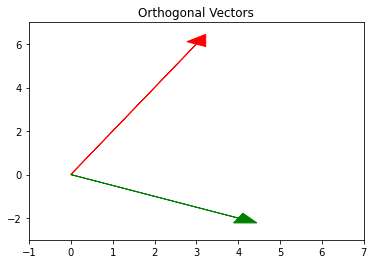

In [225]:
# synonym for orthogonal: perpendicular.  
# The dot product = 0

a = [3, 6]
b = [4, -2]

plt.arrow(0,0, a[0], a[1],head_width=.5, head_length=0.5, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.5, head_length=0.5, color ='green')
plt.xlim(-1,7)          
plt.ylim(-3,7)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# a.b = -30 -24 + 14 != 0 
# Not orthogonal

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [243]:
c = np.array([2, 15, 6, 20])
c

array([ 2, 15,  6, 20])

In [252]:
# Those have one thing in common: ||c|| = Squared Norm  with manual calc.
4 + 225 + 36 + 400

665

In [246]:
np.dot(c,c)

665

In [251]:
# cT.c

np.matmul(c.T, c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Vectors in LaTex:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\1\end{bmatrix}    = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [260]:
f = [4, 12, 11, 9, 2]
len = np.sqrt( np.dot(f,f) )
len

19.131126469708992

In [273]:
# Unit vector of f: f_unit

f_unit = [4/len, 12/len, 11/len, 9/len, 2/len]

f_unit

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

#** Linear Independence / Dependence **

---



## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

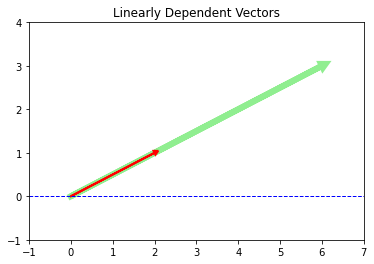

In [301]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1,7)          
plt.ylim(-1,4)

v = [2,1] 
v2 = [6,3]


# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot the arrows
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=6, head_width=.1, head_length=0.1, color ='lightgreen')
plt.arrow(0,0, v[0], v[1], linewidth=2, head_width=.1, head_length=0.1, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

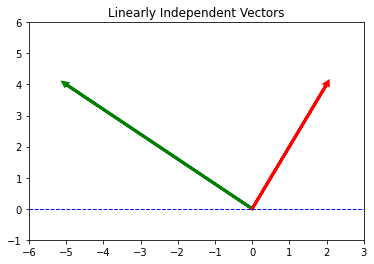

In [317]:
#  Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-6,3)          
plt.ylim(-1,6)

# Original Vector
v3 = [2,4] 
v4 = [-5,4]


axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot the arrows
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v4[0], v4[1], linewidth=3, head_width=.1, head_length=0.1, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.1, head_length=0.1, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# Both vectors are linearly dependent.  Span = 0

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# l, m, n are independent on each other.  The span is infinite.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



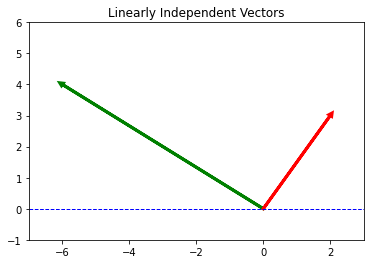

In [320]:
# Orthogonal

plt.xlim(-7,3)          
plt.ylim(-1,6)

# Original Vector
v3 = [2,3] 
v4 = [-6,4]


axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot the arrows
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v4[0], v4[1], linewidth=3, head_width=.1, head_length=0.1, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.1, head_length=0.1, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

A basis can be formed by  linearly independent vectors

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# The rank is 3. There is no dependency on rows or column combinations.

## 7.2 What does the rank of a matrix tell us?

Rank shows the independence in columns and rows. Let's say we have 3x3 matrix.
If one row(or column) is made out of other rows or columns, then the rank is less than 3. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

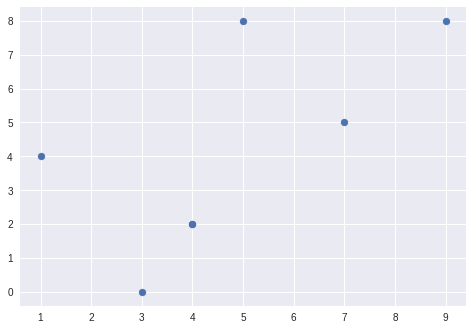

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()